In [1]:
input_segmentation_file = "i:/TestExportedData/1175_Sa_segmentation.npz"

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Replace _segmentation with _ultrasound to get the ultrasound file
input_ultrasound_file = input_segmentation_file.replace("_segmentation", "_ultrasound")
input_secondary_file = input_segmentation_file.replace("_segmentation", "_secondary")
input_indices_file = input_segmentation_file.replace("_segmentation", "_indices")

In [4]:
# Read the ultrasound image
segmentation = np.load(input_segmentation_file)['arr_0']
ultrasound = np.load(input_ultrasound_file)['arr_0']
secondary = np.load(input_secondary_file)['arr_0']
indices = np.load(input_indices_file)['arr_0']

In [5]:
# Print shape, min, and max values for all loaded arrays
print(f"Segmentation shape: {segmentation.shape}, min: {np.min(segmentation)}, max: {np.max(segmentation)}")
print(f"Ultrasound shape:   {ultrasound.shape}, min: {np.min(ultrasound)}, max: {np.max(ultrasound)}")
print(f"Secondary shape:    {secondary.shape}, min: {np.min(secondary)}, max: {np.max(secondary)}")
print(f"Indices shape:      {indices.shape}, min: {np.min(indices)}, max: {np.max(indices)}")


Segmentation shape: (3013, 512, 512, 1), min: 0, max: 1
Ultrasound shape:   (3013, 512, 512, 1), min: 0, max: 255
Secondary shape:    (3013, 512, 512, 1), min: -4095, max: 2710
Indices shape:      (254,), min: 0, max: 3003


In [6]:
# Use numpy random seed for reproducibility
np.random.seed(0)

# Get a random sample of indices values
sample_indices = indices[np.random.choice(indices.shape[0], 10, replace=False)]
sample_indices.sort()

print(f"Sample indices: {sample_indices}")

Sample indices: [ 726  957 1155 1342 1672 1837 1925 2057 2387 2695]


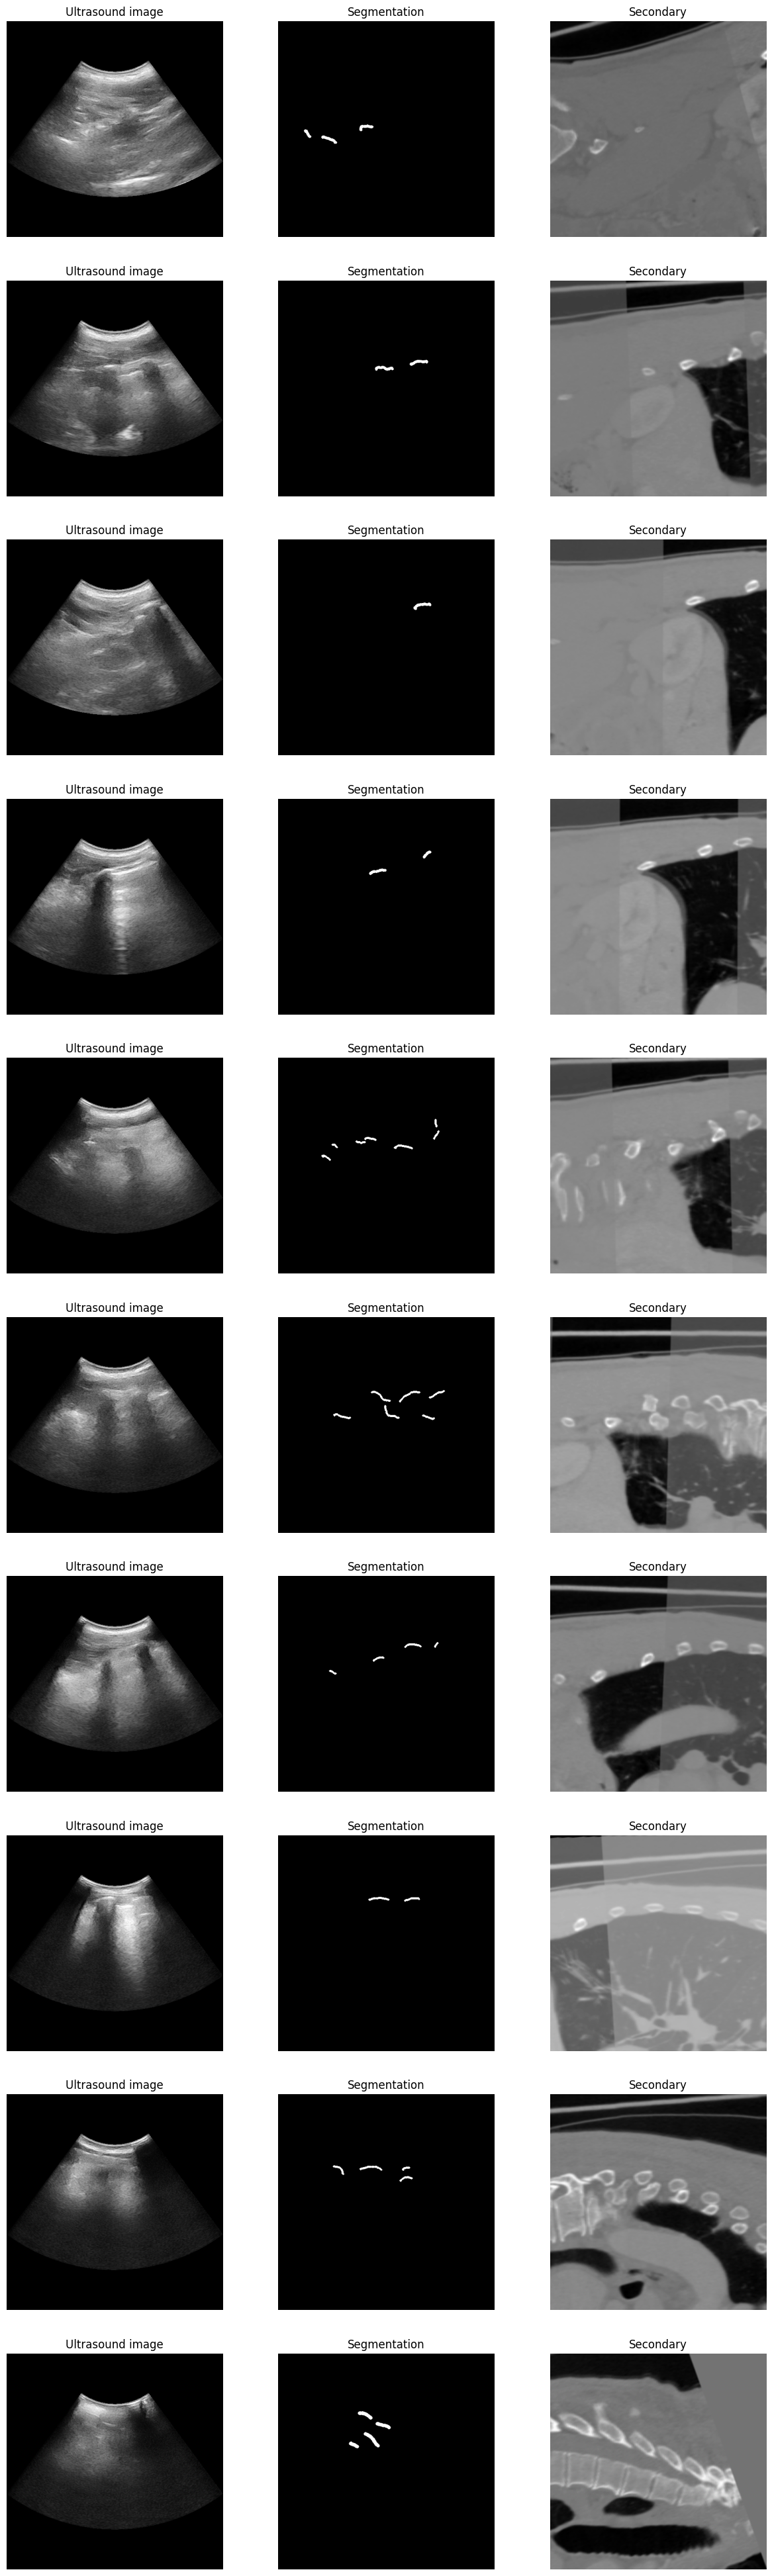

In [7]:
# Create a figure with one row for each sample index. The columns will be the ultrasound image, the segmentation and the secondary
fig, ax = plt.subplots(len(sample_indices), 3, figsize=(15, 5 * len(sample_indices)))

# For each sample index, plot the ultrasound image, the segmentation and the secondary
for i, index in enumerate(sample_indices):
    ax[i, 0].imshow(ultrasound[index, :, :], cmap='gray')
    ax[i, 0].set_title('Ultrasound image')
    ax[i, 0].axis('off')

    ax[i, 1].imshow(segmentation[index, :, :], cmap='gray')
    ax[i, 1].set_title('Segmentation')
    ax[i, 1].axis('off')

    ax[i, 2].imshow(secondary[index, :, :], cmap='gray')
    ax[i, 2].set_title('Secondary')
    ax[i, 2].axis('off')
    
plt.show()